# Introduction to sklearn

This notebook is all about sklearn of how we getting the data ready and make pridictions, then load and save this together

0. End to end sklearn workflow
1. Getting the data ready
2. Choose the right model (estimator)
3. fit the model and and use it to make predictions on data
4. Evaluating the model
5. Improve the model
6. save and load trained model
7. putting it all together


In [1]:
machine_learning = ['0. An end-to-end sklearn workflow',
                   '1. Getting the data ready',
                   '2. choose the right model suitable for problem',
                   '3. Fit the model and make predictions on data',
                   '4. Evaluate the model',
                   '5. Save and load the trained model',
                   '6. Putting it all together']

machine_learning

['0. An end-to-end sklearn workflow',
 '1. Getting the data ready',
 '2. choose the right model suitable for problem',
 '3. Fit the model and make predictions on data',
 '4. Evaluate the model',
 '5. Save and load the trained model',
 '6. Putting it all together']

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## 0. An  end-to-end sklearn workflow

In [9]:
# Getting the data Ready

heart_disease = pd.read_csv('Data/13.1 heart-disease.csv')

In [10]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# split this data into x and y (featured and labels)

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']


In [19]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [21]:
#2 choosing the right model according to our problem
# our problem is to detect wether a patient have heart disease or not so its classifier problem

from sklearn.ensemble import RandomForestClassifier

In [22]:
model = RandomForestClassifier()

In [23]:
#3 fit the model ( first we split our features and labels into trainig and testing section)

from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [27]:
# once we split our data now fit this into model 

model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
# now make prediction on trained model
model.predict(x_test)

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [32]:
#4. Evaluate the model

#on training data

model.score(x_train, y_train)



1.0

In [33]:
# evaluating on testing data

model.score(x_test, y_test)

0.7868852459016393

In [34]:
#5. Improve the model

# creating a loop to check 

for i in range(10, 100, 10):
    print(f"I am trying the check the loop value for {i} to put data")

I am trying the check the loop value for 10 to put data
I am trying the check the loop value for 20 to put data
I am trying the check the loop value for 30 to put data
I am trying the check the loop value for 40 to put data
I am trying the check the loop value for 50 to put data
I am trying the check the loop value for 60 to put data
I am trying the check the loop value for 70 to put data
I am trying the check the loop value for 80 to put data
I am trying the check the loop value for 90 to put data


In [49]:
for i in range(10, 200, 10):
    print(f"Trying to fit the model with {i} estimators....")
    model = RandomForestClassifier(n_estimators = i).fit(x_train, y_train)
    print(f"The accuracy score on test set is: {model.score(x_test, y_test) * 100} %")
    print('')

Trying to fit the model with 10 estimators....
The accuracy score on test set is: 75.40983606557377 %

Trying to fit the model with 20 estimators....
The accuracy score on test set is: 78.68852459016394 %

Trying to fit the model with 30 estimators....
The accuracy score on test set is: 81.9672131147541 %

Trying to fit the model with 40 estimators....
The accuracy score on test set is: 77.04918032786885 %

Trying to fit the model with 50 estimators....
The accuracy score on test set is: 78.68852459016394 %

Trying to fit the model with 60 estimators....
The accuracy score on test set is: 83.60655737704919 %

Trying to fit the model with 70 estimators....
The accuracy score on test set is: 80.32786885245902 %

Trying to fit the model with 80 estimators....
The accuracy score on test set is: 80.32786885245902 %

Trying to fit the model with 90 estimators....
The accuracy score on test set is: 80.32786885245902 %

Trying to fit the model with 100 estimators....
The accuracy score on test

In [57]:
# trying it by own
np.random.seed(33)
for i in range(10, 100, 10):
    print(f"Tring to fit the model with {i} estimators.....")
    model = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"The accuracy score on test data is: {model.score(x_test, y_test) * 100}%")
    print(' ')

Tring to fit the model with 10 estimators.....
The accuracy score on test data is: 77.04918032786885%
 
Tring to fit the model with 20 estimators.....
The accuracy score on test data is: 80.32786885245902%
 
Tring to fit the model with 30 estimators.....
The accuracy score on test data is: 78.68852459016394%
 
Tring to fit the model with 40 estimators.....
The accuracy score on test data is: 78.68852459016394%
 
Tring to fit the model with 50 estimators.....
The accuracy score on test data is: 81.9672131147541%
 
Tring to fit the model with 60 estimators.....
The accuracy score on test data is: 77.04918032786885%
 
Tring to fit the model with 70 estimators.....
The accuracy score on test data is: 78.68852459016394%
 
Tring to fit the model with 80 estimators.....
The accuracy score on test data is: 80.32786885245902%
 
Tring to fit the model with 90 estimators.....
The accuracy score on test data is: 81.9672131147541%
 


In [58]:
#6. Save and load the model

import pickle

In [59]:
pickle.dump(model, open('Scrach_model.pkl', 'wb'))

In [60]:
# now load it and check on test data

loaded_model = pickle.load(open('Scrach_model.pkl', 'rb'))

In [61]:
loaded_model.score(x_test, y_test)

0.819672131147541

# This time I will do all by my own
## let's do some practice

In [63]:
data = pd.read_csv('Data/13.1 heart-disease.csv')

In [64]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [65]:
# getting the data ready
x = data.drop('target', axis=1)
y = data['target']

In [66]:
# choose the model (clasification problem)

from sklearn.ensemble import RandomForestClassifier

In [67]:
clf = RandomForestClassifier()

In [70]:
# fit the model

from sklearn.model_selection import train_test_split

In [71]:
x_training, x_testing, y_training, y_testing = train_test_split(x, y, test_size=0.3)

In [73]:
clf.fit(x_training, y_training)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
# predics the model
preds = clf.predict(x_test)
preds

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [79]:
# Evaluate the model on traing data
clf.score(x_training, y_training)

1.0

In [80]:
# evaluating on test data

clf.score(x_testing, y_testing)

0.8241758241758241

In [83]:
# Improve the model using loops
np.random.seed(33)

for i in range(10, 200, 10):
    print(f"Evaluation on {i} estimators...........")
    
    clf = RandomForestClassifier(n_estimators=i).fit(x_training, y_training)
    print(f"The accuracy score is: {clf.score(x_testing, y_testing) * 100}%")
    print('  ')

Evaluation on 10 estimators...........
The accuracy score is: 81.31868131868131%
  
Evaluation on 20 estimators...........
The accuracy score is: 83.51648351648352%
  
Evaluation on 30 estimators...........
The accuracy score is: 81.31868131868131%
  
Evaluation on 40 estimators...........
The accuracy score is: 81.31868131868131%
  
Evaluation on 50 estimators...........
The accuracy score is: 83.51648351648352%
  
Evaluation on 60 estimators...........
The accuracy score is: 83.51648351648352%
  
Evaluation on 70 estimators...........
The accuracy score is: 83.51648351648352%
  
Evaluation on 80 estimators...........
The accuracy score is: 81.31868131868131%
  
Evaluation on 90 estimators...........
The accuracy score is: 83.51648351648352%
  
Evaluation on 100 estimators...........
The accuracy score is: 82.41758241758241%
  
Evaluation on 110 estimators...........
The accuracy score is: 80.21978021978022%
  
Evaluation on 120 estimators...........
The accuracy score is: 80.21978021

In [84]:
# save the model
import pickle

pickle.dump(clf, open('end-to-end-workflow.pkl', 'wb'))

In [85]:
# load the model 
load_model = pickle.load(open('end-to-end-workflow.pkl', 'rb'))

In [86]:
# checking the accuracy on test data set
load_model.score(x_testing, y_testing)

0.8131868131868132

# Alhamdulillah done it very well but  it takes almost two days

# 1.Getting our data ready

In [5]:
# cheking what is our machine learning

machine_learning

['0. An end-to-end sklearn workflow',
 '1. Getting the data ready',
 '2. choose the right model suitable for problem',
 '3. Fit the model and make predictions on data',
 '4. Evaluate the model',
 '5. Save and load the trained model',
 '6. Putting it all together']

In [6]:
# standard imports

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Getting the data ready to be used with machine learning

### I.  Splitting the data into features and labels (x and y)
### II. Filling (imputing) or disregarding missing values in data
### III. Converting non-numerical values to numarical value (featured encoding)

In [11]:
# import the new data set and train our model

car_sale = pd.read_csv('Data/car-sales-extended.csv')

In [14]:
car_sale.head(), car_sale.dtypes

(     Make Colour  Odometer (KM)  Doors  Price
 0   Honda  White          35431      4  15323
 1     BMW   Blue         192714      5  19943
 2   Honda  White          84714      4  28343
 3  Toyota  White         154365      4  13434
 4  Nissan   Blue         181577      3  14043,
 Make             object
 Colour           object
 Odometer (KM)     int64
 Doors             int64
 Price             int64
 dtype: object)

In [15]:
x = car_sale.drop('Price', axis=1)
y = car_sale['Price']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
model = RandomForestRegressor()


In [18]:
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'Toyota'

# # Convert the Strings into numeric

In [20]:
from sklearn.compose import ColumnTransformer

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
features = ['Make', 'Colour', 'Doors']

In [24]:
one_hot = OneHotEncoder()

In [26]:
transformer = ColumnTransformer([('One_Hot', one_hot, features)], remainder='passthrough')

In [27]:
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [36]:
# Trying it by own

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()

transformer = ColumnTransformer([('One_hot', one_hot, features)], remainder='passthrough')

In [38]:
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

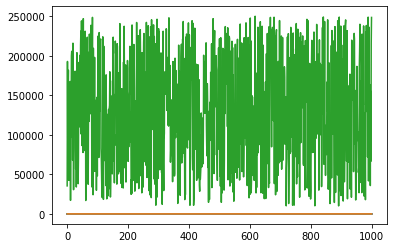

In [42]:
import matplotlib.pyplot as plt
plt.plot(transformed_x);

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

data = ['Make', 'Colour', 'Doors']

one_hot = OneHotEncoder()

transformer = ColumnTransformer([('one_hot', 
                                  one_hot,
                                  data)],
                                remainder='passthrough')

In [47]:
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [48]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [49]:
# now our strings are in the form of numbers let's refit model 

np.random.seed(44)

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

In [50]:
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [52]:
model.score(x_test, y_test)

0.13511296375273174

In [53]:
import pickle 

In [54]:
pickle.dump(model, open('car_sales_first.pkl', 'wb'))

In [56]:
converted_model = pickle.load(open('car_sales_first.pkl', 'rb'))

In [57]:
converted_model.score(x_test, y_test)

0.13511296375273174

In [58]:
converted_model.score(x_test, y_test)

0.13511296375273174

# Getting the missing data ready for machine learning model

In [59]:
machine_learning

['0. An end-to-end sklearn workflow',
 '1. Getting the data ready',
 '2. choose the right model suitable for problem',
 '3. Fit the model and make predictions on data',
 '4. Evaluate the model',
 '5. Save and load the trained model',
 '6. Putting it all together']

In [60]:
car_sales_missing = pd.read_csv('Data/car-sales-extended-missing-data.csv')

In [61]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [62]:
# checking how many cells are empty
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

# Fill this missing data 
## 1. Features will be replaced by some data
## 2. Labels should droped the missing values

In [70]:
# 1. Fill the Data

car_sales_missing['Make'].fillna('missing', inplace=True)
car_sales_missing['Colour'].fillna('missing', inplace=True)
car_sales_missing['Odometer (KM)'].fillna('missing', inplace=True)
car_sales_missing['Doors'].fillna(4, inplace=True)

In [71]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4.0,15323.0
1,BMW,Blue,192714,5.0,19943.0
2,Honda,White,84714,4.0,28343.0
3,Toyota,White,154365,4.0,13434.0
4,Nissan,Blue,181577,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820,4.0,32042.0
996,missing,White,155144,3.0,5716.0
997,Nissan,Blue,66604,4.0,31570.0
998,Honda,White,215883,4.0,4001.0


In [74]:
# 2. Drop the missing data

car_sales_missing.dropna(inplace=True)

In [75]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [76]:
len(car_sales_missing)

950

## Our Data is ready so let it in to use in ML model

In [77]:
x = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [84]:
# converting the data into nubmers 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

features = ['Make', 'Colour', 'Doors']

one_hot = OneHotEncoder()

transformer = ColumnTransformer([('one_hot', one_hot, features)], remainder='passthrough')

In [85]:
transformed_x = transformer.fit_transform(x)

ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

In [86]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

data = ['Make', 'Colour', 'Doors']

one_hot = OneHotEncoder()

transformer = ColumnTransformer([('one_hot', 
                                  one_hot,
                                  data)],
                                remainder='passthrough')

In [87]:
transformed_x = transformer.fit_transform(x)

ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

In [88]:
x_train

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.63330e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.46825e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.84878e+05],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 3.79830e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.34760e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.27480e+04]])